## Kaggle API

In [ ]:
# Loading Packages
import zipfile
import os

!kaggle competitions download -c titanic
with zipfile.ZipFile(os.getcwd()+'\\titanic.zip', 'r') as zip_ref:
    zip_ref.extractall(os.getcwd()+"\\inputs\\")
os.remove(os.getcwd()+'\\titanic.zip')
!mkdir outputs

In [1]:
# Loading packages
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('./inputs/train.csv')
test = pd.read_csv('./inputs/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
import plotly.express as px
colors = ['#333F44', '#37AA9C', '#94F3E4']

## Análise Exploratória

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


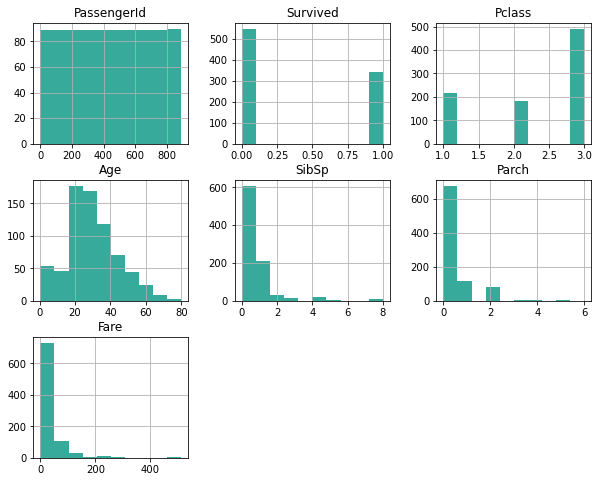

In [179]:
train.hist(figsize=(10,8), color='#37AA9C');

In [61]:
fig = px.pie(train.groupby('Sex',as_index=False).agg({'PassengerId':'count'}),
             values='PassengerId',
             names='Sex',
             title='Distribuição por Sexo',
             color_discrete_sequence=colors,
             hole=.4)
fig.show()

In [106]:
sex_survived = train.groupby(['Survived','Sex'],as_index=False).agg({'PassengerId':'count'})
sex_survived['Survived_label'] = sex_survived.Survived.map(lambda x: 'Morreu' if x==0 else 'Viveu')
fig = px.bar(sex_survived,
             text='PassengerId',
             x='Survived_label', y='PassengerId',
             color='Sex',barmode='group',
             title='Sobreviventes por Sexo',
             labels={'Survived_label':'','PassengerId':'','Sex':''},
             color_discrete_sequence=colors
             )
fig.update_traces(texttemplate='%{text:.4s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [105]:
sex_survived = train.groupby(['Survived','Pclass'],as_index=False).agg({'PassengerId':'count'})
sex_survived['Survived_label'] = sex_survived.Survived.map(lambda x: 'Morreu' if x==0 else 'Viveu')
sex_survived['Class'] = sex_survived.Pclass.map(lambda x: '1ª Classe' if x==1 else '2ª Classe' if x==2 else '3ª Classe' )
fig = px.bar(sex_survived,
             text='PassengerId',
             x='Survived_label',
             y='PassengerId',
             color='Class',
             barmode='group',
             title='Sobreviventes por Classe',
             labels={'Survived_label':'','PassengerId':'','Class':''},
             color_discrete_sequence=colors
             )
fig.update_traces(texttemplate='%{text:.4s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [107]:
sex_survived = train.groupby(['Survived','Embarked'],as_index=False).agg({'PassengerId':'count'})
sex_survived['Survived_label'] = sex_survived.Survived.map(lambda x: 'Morreu' if x==0 else 'Viveu')
sex_survived['Embarked_name'] = sex_survived.Embarked.map(lambda x: 'Cherbourg' if x=='C' else 'Queenstown' if x=='Q' else 'Southampton')
fig = px.bar(sex_survived,
             text='PassengerId',
             x='Survived_label',
             y='PassengerId',
             color='Embarked_name',
             barmode='group',
             title='Sobreviventes por Local de Embarque',
             labels={'Survived_label':'','PassengerId':'','Embarked_name':''},
             color_discrete_sequence=colors
             )
fig.update_traces(texttemplate='%{text:.4s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [81]:
train.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [94]:
var = train[train.Sex=='male'].reset_index(drop=True)
var.Survived.value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [80]:
var = train[train.Sex=='female'].reset_index(drop=True)
var.Survived.value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [102]:
var = train[train.Pclass==1].reset_index(drop=True)
var.Survived.value_counts() # normalize=True

1    136
0     80
Name: Survived, dtype: int64

In [103]:
var = train[train.Pclass==2].reset_index(drop=True)
var.Survived.value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [104]:
var = train[train.Pclass==3].reset_index(drop=True)
var.Survived.value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [108]:
var = train[train.Pclass==1].reset_index(drop=True)
var.Survived.value_counts(normalize=True)

1    0.62963
0    0.37037
Name: Survived, dtype: float64

In [109]:
var = train[train.Pclass==3].reset_index(drop=True)
var.Survived.value_counts(normalize=True)

0    0.757637
1    0.242363
Name: Survived, dtype: float64

In [171]:
fig = ff.create_distplot([train[train.Survived==0].Age.dropna(),
                          train[train.Survived==1].Age.dropna()],
                         group_labels=['Morreu','Viveu'],
                         colors=colors,
                         show_rug=False)
fig.update_layout(title_text='Survived por Age')
fig.show()

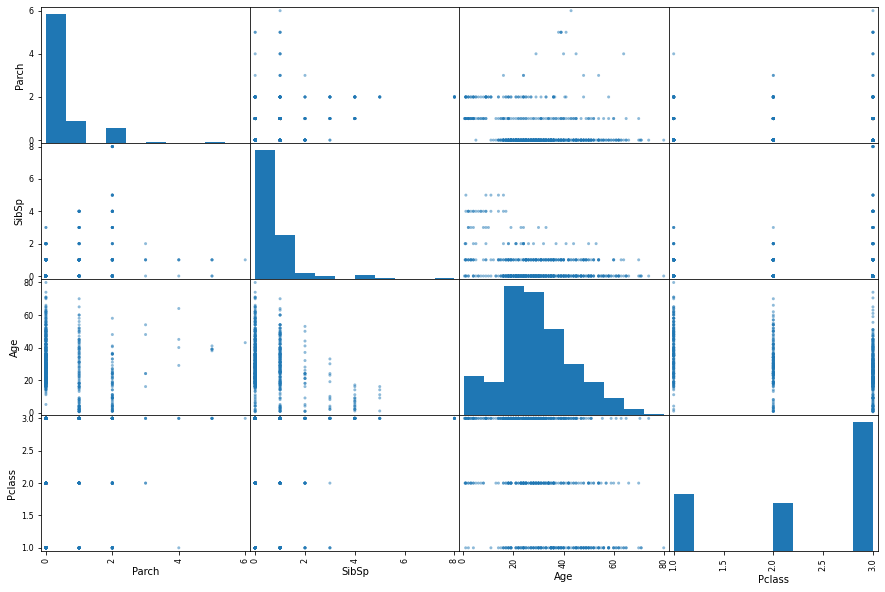

In [189]:
col = ['Parch','SibSp','Age','Pclass']
pd.plotting.scatter_matrix(train[col], figsize=(15,10));

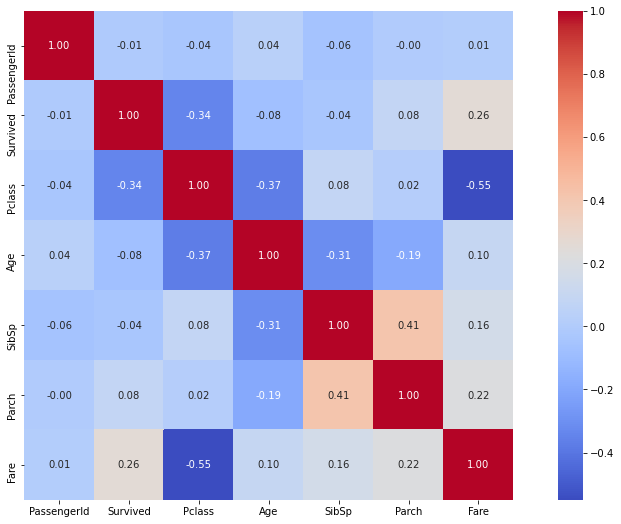

In [219]:
plt.figure(figsize=(16,9))
sns.heatmap(train.corr(), annot=True, fmt='.2f',square=True,cmap="coolwarm");

## Limpeza

In [223]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [225]:
train.Age.fillna(train.Age.mean(),inplace=True)

In [226]:
train = train[~train.Embarked.isna()].reset_index(drop=True)

In [229]:
train.drop(['Cabin'],axis=1,inplace=True)

In [227]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Preparação dos Dados

In [231]:
train['sex_binario'] = train.Sex.map({'male':0,'female':1})
train['embarked_binario'] = train.Embarked.map({'S':1,'Q':2,'C':3})

In [236]:
train['child'] = train.Age.map(lambda x: 1 if x<=12 else 0)

In [237]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_binario,embarked_binario,child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,3,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0


In [259]:
features = ['Survived','Pclass','Age','SibSp','Parch','sex_binario','embarked_binario']
base = train[features].copy()

In [262]:
base.head()

,Survived,Pclass,Age,SibSp,Parch,sex_binario,embarked_binario
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,3
2,1,3,26.0,0,0,1,1
3,1,1,35.0,1,0,1,1
4,0,3,35.0,0,0,0,1


## Model

In [267]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score

In [266]:
X = base.drop('Survived', axis=1)
y = base['Survived']

In [270]:
# Dividimos os dados em 50% para treino e 50% para teste
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=.5)

In [271]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((444, 6), (445, 6), (444,), (445,))

In [274]:
# Criando o modelo
mdl_rf = RandomForestClassifier(n_estimators=1000, n_jobs=6, random_state=0, class_weight='balanced')
mdl_rf.fit(Xtrain,ytrain)
# Fazendo o predict
p = mdl_rf.predict(Xtest)

In [278]:
acc = round(accuracy_score(ytest, p),4)
precis = round(precision_score(ytest, p),4)

print(f'Accuracy: {acc} | Precision: {precis}')

Accuracy: 0.7933 | Precision: 0.7326


## Submission

In [307]:
test = pd.read_csv('./inputs/test.csv')
test['sex_binario'] = test.Sex.map({'male':0,'female':1})
test['embarked_binario'] = test.Embarked.map({'S':1,'Q':2,'C':3})
test.Age.fillna(test.Age.mean(),inplace=True)
base_test = test[['Pclass','Age','SibSp','Parch','sex_binario','embarked_binario']].copy()
base_test.isna().sum()

Pclass              0
Age                 0
SibSp               0
Parch               0
sex_binario         0
embarked_binario    0
dtype: int64

In [300]:
base_test.head()

,Pclass,Age,SibSp,Parch,sex_binario,embarked_binario
0,3,34.5,0,0,0,2
1,3,47.0,1,0,1,1
2,2,62.0,0,0,0,2
3,3,27.0,0,0,0,1
4,3,22.0,1,1,1,1


In [308]:
p = mdl_rf.predict(base_test)

In [309]:
sub = pd.Series(p, index=test.PassengerId, name='Survived')

In [310]:
sub

PassengerId
892     0
893     1
894     0
895     1
896     0
       ..
1305    0
1306    1
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: int64

In [311]:
sub.to_csv('./outputs/titanic_submission_artigo.csv', header=True)

In [312]:
!kaggle competitions submit -c titanic -f outputs/titanic_submission_artigo.csv -m "Primeiro modelo artigo"

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 21.3kB/s]
100%|##########| 3.18k/3.18k [00:04<00:00, 785B/s]  
